# TP Coding an autoencoder in tensorflow/keras

Author : Alasdair Newson

alasdair.newson@telecom-paris.fr

Student: Marina de Menezes Lima

## Objective:

The goal of this TP is to explore autoencoders and variational autoencoders applied to a simple dataset. In this first part, we will look at an autoencoder applied to MNIST.

### Your task:
You need to add the missing parts in the code (parts between # --- START CODE HERE and # --- END CODE HERE or # FILL IN CODE)

First of all, let's load some packages

In [1]:

import pdb
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam


First, we define a function to load the mnist dataset.

In [2]:
def load_data():
  (X_train, Y_train_scalar), (X_test, Y_test_scalar) = mnist.load_data()

  n_max = 10000
  X_train = X_train[0:n_max,:,:]
  X_test = X_test[0:n_max,:,:]
  Y_train_scalar = Y_train_scalar[0:n_max]
  Y_test_scalar = Y_test_scalar[0:n_max]

  # normalise images between 0 and 1
  X_train = X_train/255.0
  X_test = X_test/255.0
  #add a channel dimension, if need be (for mnist data)
  if(X_train.ndim ==3):
    X_train = np.expand_dims(X_train, axis=3)
    X_test = np.expand_dims(X_test, axis=3)
  return X_train,X_test

Now, we define the general parameters of the autoencoder

In [ ]:
X_train, X_test = load_data()

# autoencoder parameters
optimizer = Adam(0.01, 0.5) #
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
img_channels = X_train.shape[3]
img_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
img_shape = (img_rows, img_cols, img_channels)
z_dim = 10
batch_size = 64
n_epochs = 40

Now, define the autoencoder architecture. In the first part, we will use the following MLP architecture :

Encoder :
- Flatten input
- Dense layer, output size z_dim
- Leaky ReLU, with $\alpha=0.2$

Decoder :
- Dense layer, output size 784
- Sigmoid Activation
- Reshape, to size $28\times 28\times 1$

For the Reshape operation, use a ```Reshape``` layer

In [11]:
n_pixels = img_rows*img_cols*img_channels

#BEGIN FILL IN CODE
model = Sequential()
model.add(Input(shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(z_dim))
model.add(LeakyReLU(alpha=0.2))

model.add(Dense(784, activation='sigmoid'))
model.add(Reshape((28,28,1)))

#END FILL IN CODE

Now, display the model (summary) and compile it. Use the binary cross-entropy loss, since we are in the case of MNIST.

In [12]:
# Build and compile the discriminator

# BEGIN FILL IN CODE

model.summary()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# END FILL IN CODE

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 784)               8624      
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


We define a function to carry out testing on the autoencoder model

In [13]:
def test_images(ae_model, test_data):
  n_images = 5
  idx = np.random.randint(0, test_data.shape[0], n_images)
  test_imgs = test_data[idx,:,:,:]

  #get output images
  output_imgs = ae_model.predict( test_imgs )
  
  r = 2
  c = n_images
  fig, axs = plt.subplots(r, c)
  for j in range(c):
    #black and white images
    axs[0,j].imshow(test_imgs[j, :,:,0], cmap='gray')
    axs[0,j].axis('off')
    axs[1,j].imshow(output_imgs[j, :,:,0], cmap='gray')
    axs[1,j].axis('off')
  plt.show()

### Train the model

Now, train the model on the mnist dataset.

Epoch 1/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2271 - accuracy: 0.7877
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.8002
Epoch 3/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.8020
Epoch 4/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.8028
Epoch 5/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.8033
Epoch 6/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.8037
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.8040
Epoch 8/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.8042
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.8044
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.8045

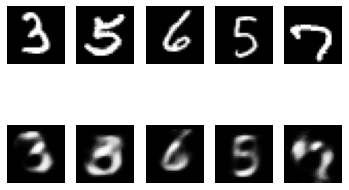

In [14]:
# BEGIN FILL IN CODE
model.fit(X_train, X_train, batch_size=batch_size, epochs=n_epochs)
# END FILL IN CODE
test_images(model, X_test)

## Convolutional model

Now, we are going to implement a convolutional architecture (with two dense layers in the middle) and compare the results. Implement the following architecture :

Encoder :
- 2D convolution, filter size $3\times3$, 8 filters, stride=(2,2), padding="SAME"
- LeakyReLU ($\alpha=0.2$)
- 2D convolution, filter size $3\times3$, 4 filters, stride=(2,2), padding="SAME"
- LeakyReLU ($\alpha=0.2$)
- Flatten tensor
- Dense layer, output size z_dim

Decoder :
- Dense layer, output size 196
- LeakyReLU ($\alpha=0.2$)
- Reshape $(7\times7\times 4)$
- 2D transposed convolution, filter size $3\times3$, 8 filters, stride=(2,2), padding="SAME"
- LeakyReLU ($\alpha=0.2$)
- 2D transposed convolution, filter size $3\times3$, 1 filter, stride=(2,2), padding="SAME"
- Sigmoid activation

The sizes of the tensors in the encoder and the decoder should be :
- $28 \times 28 \times 1$ -> $14 \times 14 \times 8$ -> $7 \times 7 \times 4$ -> z_dim
- z_dim -> $7 \times 7 \times 4$ -> $14 \times 14 \times 8$ -> $28 \times 28 \times 1$

Use the previous code as an example, and implement and train the architecture.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 8)         80        
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 4)           292       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 4)           0         
                                                                 
 flatten_3 (Flatten)         (None, 196)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1970      
                                                                 
 dense_7 (Dense)             (None, 196)              

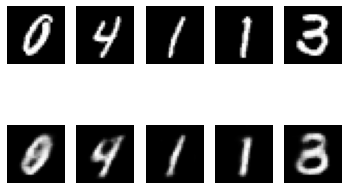

In [16]:
#BEGIN FILL IN CODE
conv_model = Sequential()
conv_model.add(Input(shape=(28,28,1)))

conv_model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(2,2), padding='same'))
conv_model.add(LeakyReLU(alpha=0.2))
conv_model.add(Conv2D(filters=4, kernel_size=(3,3), strides=(2,2), padding='same'))
conv_model.add(LeakyReLU(alpha=0.2))
conv_model.add(Flatten())
conv_model.add(Dense(z_dim))

conv_model.add(Dense(196))
conv_model.add(LeakyReLU(alpha=0.2))
conv_model.add(Reshape((7,7,4)))
conv_model.add(Conv2DTranspose(filters=8, kernel_size=(3,3), strides=(2,2), padding='same'))
conv_model.add(LeakyReLU(alpha=0.2))
conv_model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2), padding='same', activation='sigmoid'))

conv_model.summary()

conv_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

conv_model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size)
test_images(conv_model, X_test)

#END FILL IN CODE



Are the performances better with this model ? Compare the number of parameters in the MLP and convolutional case

**Answer**: From analysing the resulting images, we can conclude that the results are better for the Convolutional case. In the MLP case, some numbers turn into images that ressemble the incorrect numbers (case of the number 3, that turns into 8) or almost unrecognizable symbols (case of the number 7). Even if not perfect, the Convolutional case presents images that are more similar to what it was expected.

The Convolutional case uses way less parameters (4,867) then the MLP case (16,474), which was expected from the theory.

## Denoising autoencoder

In this part, we take the previous architecture, but now we implement a __denoising__ autoencoder. For this, we simply add Gaussian noise to the input during training, and require the autoencoder to reconstruct the non-noisy ground truth. You can do add the noise using the following function :
- np.random.normal(loc=0.0, scale=1.0, size=curr_batch.shape)

First, we modify the ```test_images``` function to take into account a noisy input.

In [17]:
def test_images(ae_model, test_data, sigma):
  n_images = 5
  idx = np.random.randint(0, test_data.shape[0], n_images)
  test_imgs = test_data[idx,:,:,:]

  #get output images
  test_imgs = np.clip(test_imgs + sigma * np.random.normal(loc=0.0, scale=1.0, size=test_imgs.shape),0.,1.)
  output_imgs = ae_model.predict( test_imgs )
  
  r = 2
  c = n_images
  fig, axs = plt.subplots(r, c)
  for j in range(c):
    #black and white images
    axs[0,j].imshow(test_imgs[j, :,:,0], cmap='gray')
    axs[0,j].axis('off')
    axs[1,j].imshow(output_imgs[j, :,:,0], cmap='gray')
    axs[1,j].axis('off')
  plt.show()

Now, use the previous codes to implement the denoising autoencoder. Use either the MLP architecture or the convolutional architecture.

__IMPORTANT NOTE__ For this part of the TP, it is useful to use a custom training process (to add the noise to a batch). For this, you can use the following function :

- loss_value = ae_model.train_on_batch(X,Y)

This allows you to create a custom batch. X should be the noisy batch, and Y should be the non-noisy batch

In this case, to simplify things, __do not worry about carrying out the complete batch over the database__, simply iterate n_iters times, and select a random batch at each iteration. To select a random set (of size batch_size) of integers between 0 and X_train.shape, use :

- np.random.randint(0, X_train.shape[0], batch_size)

Use sigma = 25.0/255.0

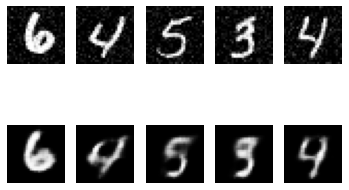

In [18]:
sigma = 25.0/255.0
n_iters = 1000
display_loss_step = 100

#BEGIN FILL IN CODE

for idx in range(n_iters):
  batch = X_train[np.random.randint(0, X_train.shape[0], batch_size),:,:,:]
  batch_noise = np.clip(batch + sigma * np.random.normal(loc=0.0, scale=1.0, size=batch.shape),0.,1.)
  loss_value = conv_model.train_on_batch(batch_noise, batch)

test_images(conv_model, X_test, sigma)

# END FILL IN CODE